In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px


In [3]:
df = pd.read_csv('zomato_dataset.csv')

In [4]:
df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [5]:
df['Delivery Rating'] = df['Delivery Rating'].fillna(0)
df['Dining Rating'] = df['Dining Rating'].fillna(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    123657 non-null  float64
 2   Delivery Rating  123657 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


In [7]:
df.isnull().sum()

Restaurant Name        0
Dining Rating          0
Delivery Rating        0
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64

In [8]:
df['Item Name'].nunique()


55693

## 1) What is the average dining rating across all restaurants in the dataset

(array([32236.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,   418.,  1446.,  5068.,  6623.,  7796., 22140.,
        18709., 24078.,  3427.,  1716.]),
 array([0.  , 0.24, 0.48, 0.72, 0.96, 1.2 , 1.44, 1.68, 1.92, 2.16, 2.4 ,
        2.64, 2.88, 3.12, 3.36, 3.6 , 3.84, 4.08, 4.32, 4.56, 4.8 ]),
 <BarContainer object of 20 artists>)

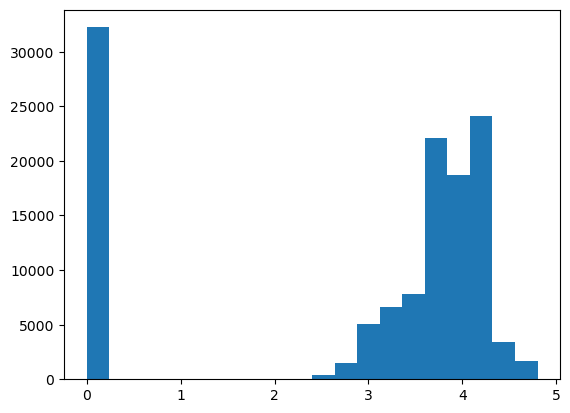

In [9]:
plt.hist(df['Dining Rating'],bins=20)

Data is right skewed and most of dining rating are between 3.5 to 4.5

In [10]:
np.mean(df['Dining Rating']).round(1)

2.8

## 2) Which metropolitan area has the highest average delivery rating

In [11]:
np.mean(df['Delivery Rating']).round(1)

3.9

In [12]:
df.columns

Index(['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes',
       'Delivery Votes', 'Cuisine ', 'Place Name', 'City', 'Item Name',
       'Best Seller', 'Votes', 'Prices'],
      dtype='object')

In [13]:
avg_rating = df[['Restaurant Name', 'Dining Rating', 'Delivery Rating','Place Name']]

In [14]:
avg_rating = avg_rating.groupby('Place Name').agg({'Delivery Rating': 'mean'})

In [15]:
avg_rating = avg_rating.sort_values(by = 'Delivery Rating',ascending=False).dropna()

In [16]:
avg_rating.head()

,Delivery Rating
Place Name,
Fort Kochi,4.6
Shobha Bazar,4.5
JM Road,4.5
Govind Nagar,4.4
College Street,4.4


Top 5 Highest rated Delivery rating metropolian places
1) Fort Kochi	
2) Shobha Bazar	
3) JM Road	
4) Greater Kailash 1 (GK1)	
5) Rajinder Nagar

## 3) What is the total number of dining votes received by all restaurants in each city

In [17]:
df.columns

Index(['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes',
       'Delivery Votes', 'Cuisine ', 'Place Name', 'City', 'Item Name',
       'Best Seller', 'Votes', 'Prices'],
      dtype='object')

In [18]:
dining_votes= df[['City','Restaurant Name', 'Dining Votes']]

In [19]:
dining_votes.groupby('City').agg({'Dining Votes':'sum'}).sort_values(by='Dining Votes',ascending=False)


,Dining Votes
City,
Jaipur,3049158
Chennai,2608970
Hyderabad,2064518
Mumbai,1863212
Kolkata,1759401
Lucknow,1471925
Ahmedabad,1456320
Bangalore,1422983
Kochi,1202972


Majority of top votes recievied by the Top Tier cities 
1) Hyderabad	
2) Chennai	
3) Jaipur	
4) Ahmedabad	
5) Lucknow	
followed by kolkata,mumbai,bangalore

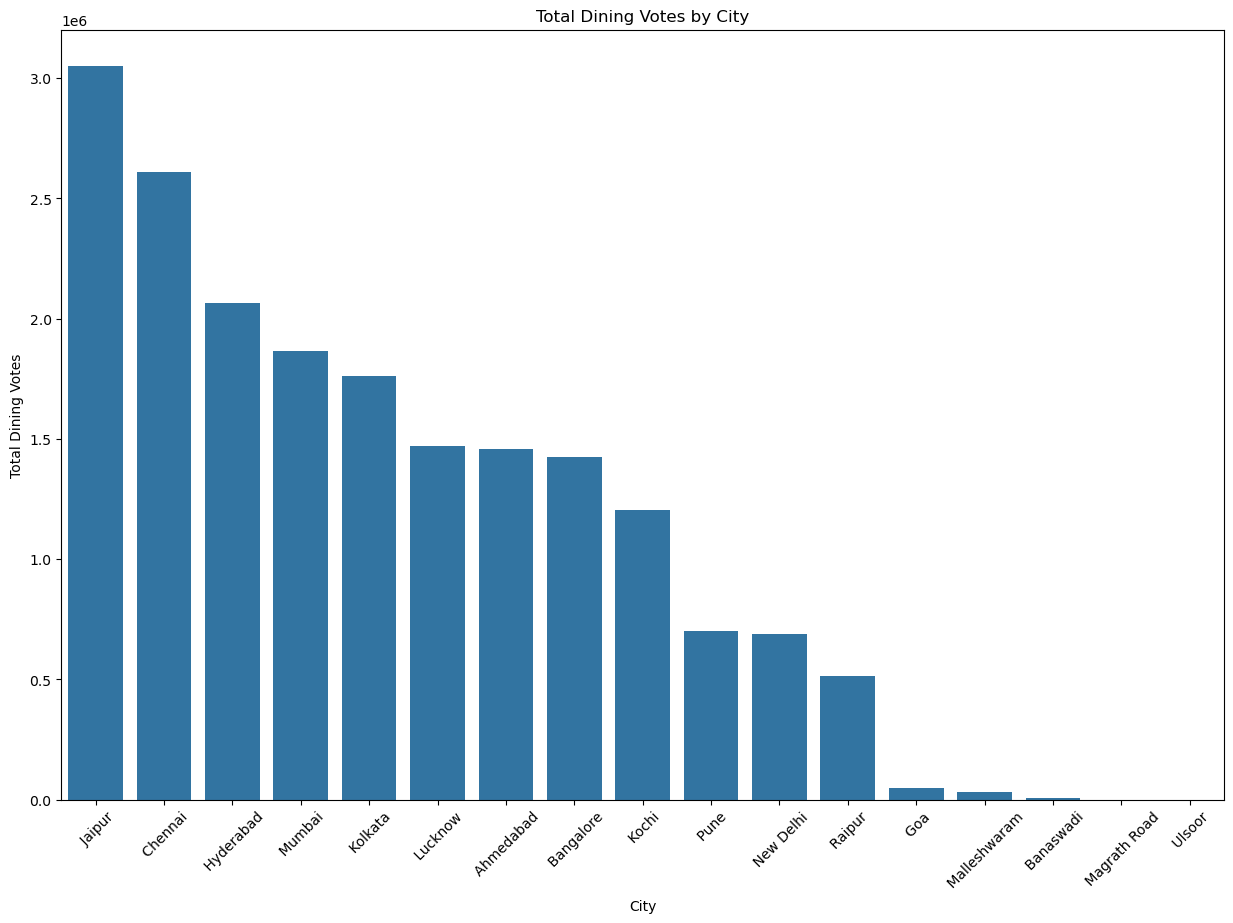

In [20]:
city_votes = dining_votes.groupby('City').agg({'Dining Votes': 'sum'}).sort_values(by='Dining Votes', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(15,10))
sns.barplot(city_votes,x='City',y='Dining Votes')
plt.title('Total Dining Votes by City')
plt.xlabel('City')
plt.ylabel('Total Dining Votes')
plt.xticks(rotation=45)
plt.show()

## 4) How many unique cuisines are represented in the dataset

In [21]:
df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [22]:
df['Cuisine '].nunique()

48

There are 48 different cuisine in the dataset

## 5) Which restaurant has the highest average dining rating in each city

In [23]:
dine_rating = df[['Restaurant Name', 'Dining Rating', 'Delivery Rating','City']]
dine_rating = dine_rating.groupby(['City','Restaurant Name']).agg({'Dining Rating': 'mean'})
dine_rating = dine_rating.sort_values(by = 'Dining Rating',ascending=False).dropna()



In [24]:
dine_rating = dine_rating.loc[dine_rating.groupby('City')['Dining Rating'].idxmax()]

In [25]:
dine_rating

,,Dining Rating
City,Restaurant Name,
Ahmedabad,Urban Khichdi,4.6
Banaswadi,GOPIZZA,3.7
Bangalore,Brik Oven,4.6
Chennai,AB's - Absolute Barbecues,4.7
Goa,Ritz Classic,4.4
Hyderabad,Exotica,4.6
Jaipur,Thali and More,4.7
Kochi,Cafe 17,4.6
Kolkata,Momo I Am,4.4


Top rated Restaurants by each city 

C:\Users\91932\AppData\Local\Temp\ipykernel_16496\1808927563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dining Rating', y='City', data=dine_rating, palette='viridis')


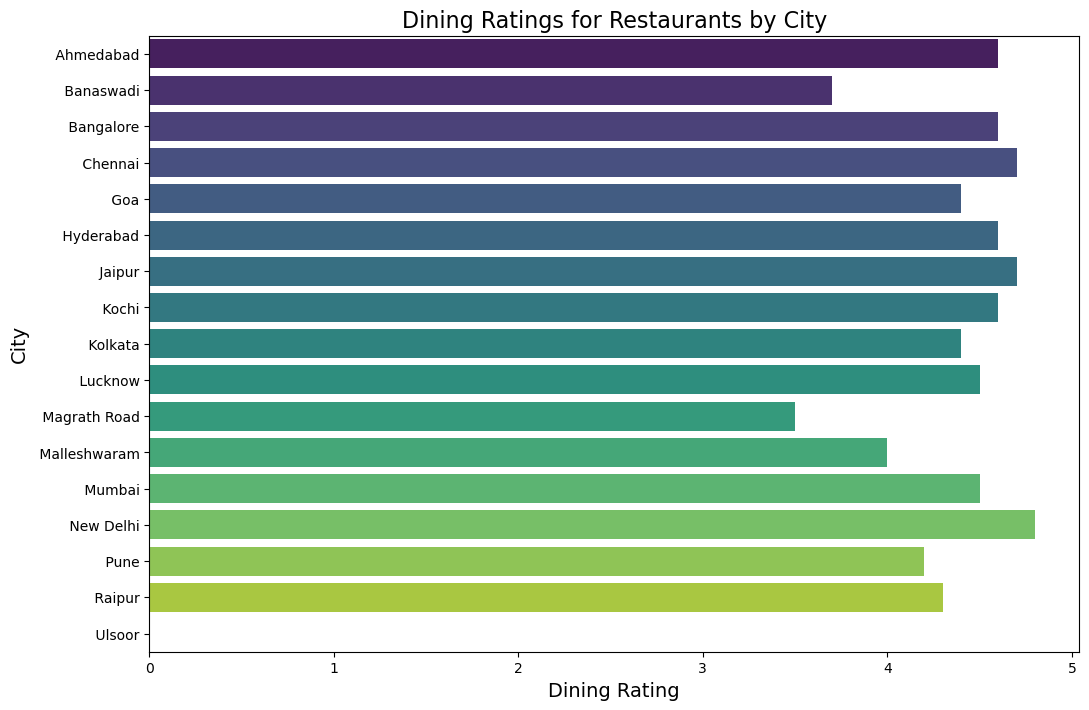

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Dining Rating', y='City', data=dine_rating, palette='viridis')

# Adding titles and labels
plt.title('Dining Ratings for Restaurants by City', fontsize=16)
plt.xlabel('Dining Rating', fontsize=14)
plt.ylabel('City', fontsize=14)

# Show the plot
plt.show()

## 6) What is the average price of the best-selling dishes compared to the non-best-selling dishes

In [27]:
df.isnull().sum()

Restaurant Name        0
Dining Rating          0
Delivery Rating        0
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64

In [28]:
df['Best Seller'].unique()

array(['BESTSELLER', nan, 'MUST TRY', "CHEF'S SPECIAL", 'SEASONAL',
       'Not eligible for coupons', 'VEGAN', 'Not on Pro', 'SPICY', 'NEW',
       'GLUTEN FREE', 'DAIRY FREE', 'FODMAP FRIENDLY',
       'Eggless available'], dtype=object)

In [29]:
df['Restaurant Name'].value_counts().head(20)

Restaurant Name
McDonald's                          2059
Domino's Pizza                      1435
Burger King                         1352
FreshMenu                           1097
Pizza Hut                           1077
Kanha                                934
La Pino'z Pizza                      868
Subway                               823
KFC                                  751
The Momoz Hub                        700
Agarwal Caterers                     637
Savoury Sea Shell                    595
Marky Momos                          567
Raj Restaurant                       555
Capital Multi Cuisine Restaurant     545
Truffles                             530
Harishankar Veg Restro               520
Casa Blanca                          508
Aromas Of Biryani                    504
Rominus Pizza And Burger             463
Name: count, dtype: int64

In [30]:
df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [31]:
import math

In [32]:
df.columns = df.columns.str.strip()
excluded_cuisine = 'Beverages'
df_filtered = df[df['Cuisine'] != excluded_cuisine]

In [33]:

df_grouped = df_filtered.groupby(by=['City','Cuisine']).agg({'Prices':'sum'}).round(0).reset_index()

In [34]:
df_grouped.sort_values(by = ['City','Prices'],ascending=[True,False]).reset_index()

,index,City,Cuisine,Prices
0,3,Ahmedabad,Desserts,295454.0
1,5,Ahmedabad,Gujarati,161715.0
2,4,Ahmedabad,Fast Food,129668.0
3,16,Ahmedabad,Sichuan,115678.0
4,15,Ahmedabad,Shake,109552.0
...,...,...,...,...
199,200,Pune,Shake,13236.0
200,191,Pune,Burger,11994.0
201,189,Pune,Bakery,10974.0
202,202,Raipur,Pizza,1498356.0


In [35]:
top_city = df_grouped.groupby(level=0)['Prices'].sum()

In [ ]:

top_cuisines_per_city = (
    df_grouped.groupby('City', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'Prices'))
    .reset_index()
)


C:\Users\91932\AppData\Local\Temp\ipykernel_16496\2251444701.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Prices'))


In [37]:
from matplotlib.ticker import FuncFormatter

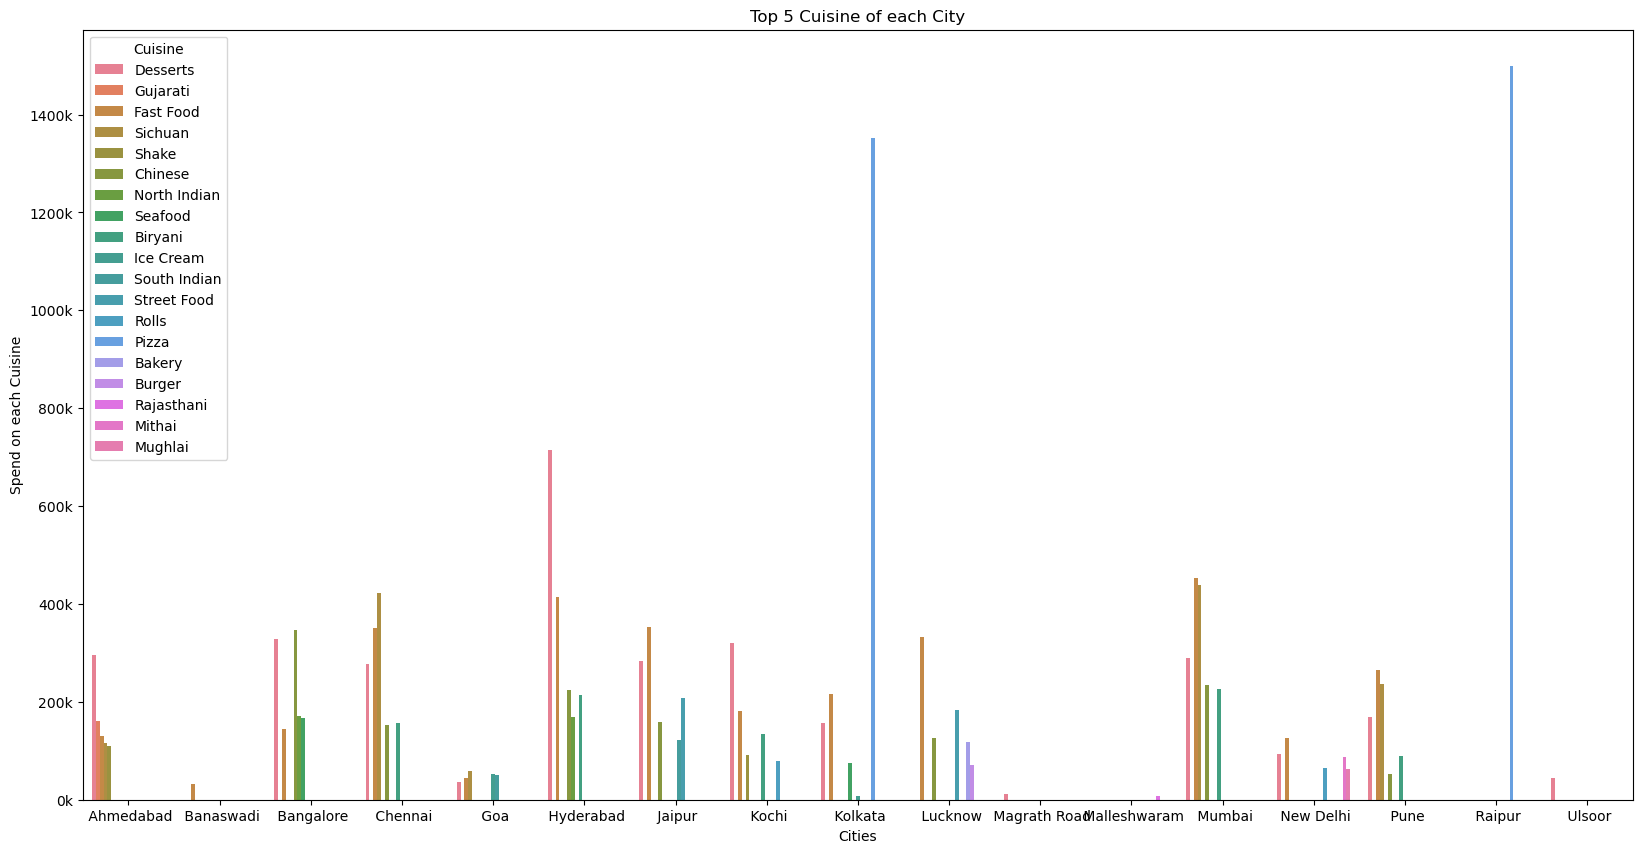

In [38]:
plt.figure(figsize=(20, 10))

# Define the formatter function for y-axis
def thousands_formatter(x, pos):
    return f'{int(x/1000)}k'

# Plotting the data using seaborn
ax = sns.barplot(data=top_cuisines_per_city, x='City', y='Prices', hue='Cuisine')

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adding labels and title
plt.title('Top 5 Cuisine of each City')
plt.xlabel('Cities')
plt.ylabel('Spend on each Cuisine')

plt.show()

In [42]:
top_cities = df_grouped.groupby(by='City').agg({'Prices':'sum'}).sort_values(by='Prices',ascending=False)

C:\Users\91932\AppData\Local\Temp\ipykernel_16496\1768404453.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_cities, x='Prices', y='City', palette="viridis")


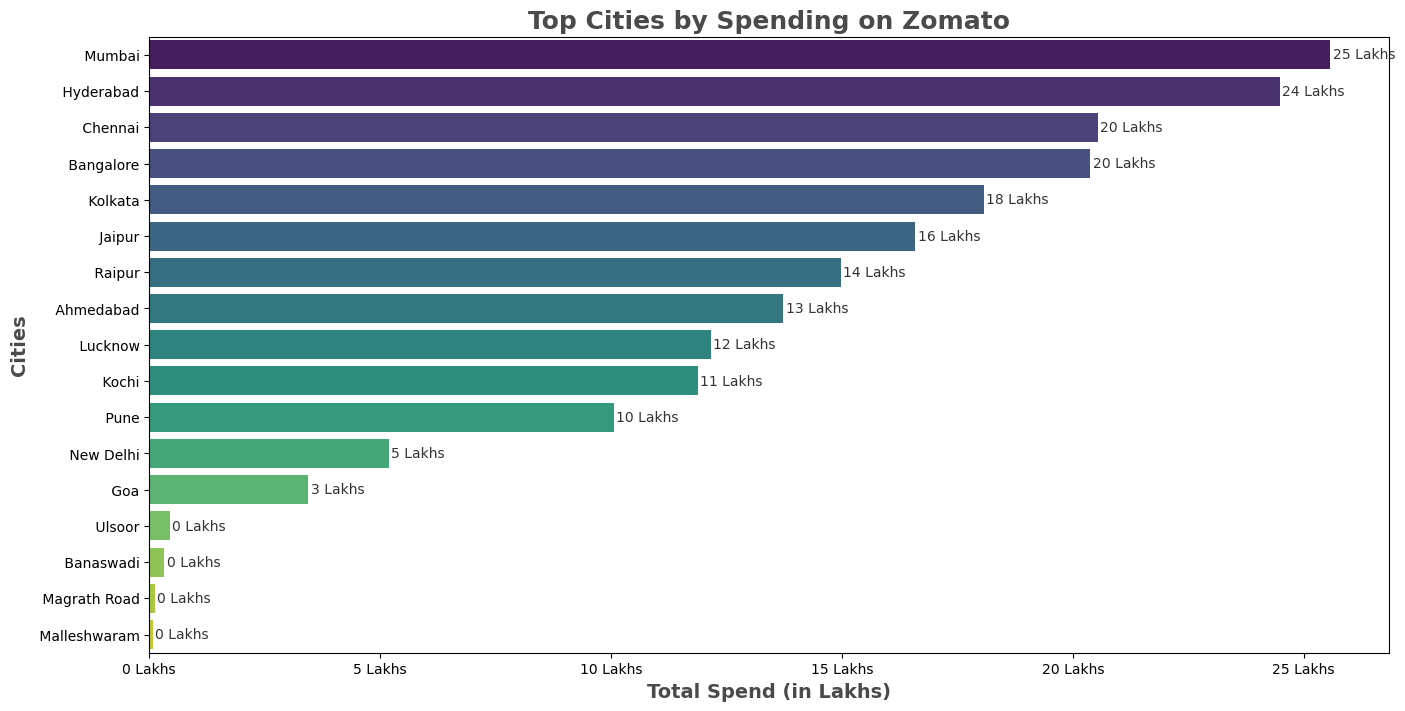

In [45]:


# Define a custom formatter function for 'lakhs'
def lakhs_formatter(x, pos):
    return f'{int(x / 100000)} Lakhs'

plt.figure(figsize=(16, 8))

# Use seaborn to create a bar plot
ax = sns.barplot(data=top_cities, x='Prices', y='City', palette="viridis")

# Set y-axis format to lakhs
ax.xaxis.set_major_formatter(FuncFormatter(lakhs_formatter))

# Adding labels and title with enhanced font size and weight
plt.title('Top Cities by Spending on Zomato', fontsize=18, weight='bold', color='#4a4a4a')
plt.xlabel('Total Spend (in Lakhs)', fontsize=14, weight='bold', color='#4a4a4a')
plt.ylabel('Cities', fontsize=14, weight='bold', color='#4a4a4a')

# Add data labels to each bar for clarity
for p in ax.patches:
    plt.text(
        p.get_width() + 5000, 
        p.get_y() + p.get_height() / 2, 
        f'{int(p.get_width() / 100000)} Lakhs', 
        ha='left', 
        va='center', 
        color='#333333', 
        fontsize=10
    )

# Show the plot
plt.show()


array(['Fast Food', 'Wraps', 'Biryani', 'Chinese', 'Beverages',
       'Desserts', 'Shake', 'Mandi', 'South Indian', 'Kebab', 'Pizza',
       'Bakery', 'Ice Cream', 'Mughlai', 'North Indian', 'Momos',
       'Shawarma', 'Burger', 'Turkish', 'Rolls', 'Coffee', 'Seafood',
       'Hyderabadi', 'Salad', 'Sichuan', 'Sandwich', 'Italian',
       'Lucknowi', 'Continental', 'American', 'Mexican', 'Kerala', 'BBQ',
       'Rajasthani', 'Healthy Food', 'Tibetan', 'Street Food', 'Mithai',
       'Juices', 'Maharashtrian', 'Thai', 'Vietnamese', 'Pasta',
       'Gujarati', 'Kathiyawadi', 'Andhra', 'Awadhi', 'Tea'], dtype=object)